Ziel: Dimensionsreduktion
-> Einteilung der Variablen in korrelierte Hauptkomponenten

Datenimport und Datentypanpassung

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

dataset = pd.read_csv("lung_cancer_dataset.csv")

# Convert text to categorical data
dataset['gender'] = dataset['gender'].astype('category')
dataset['radon_exposure'] = dataset['radon_exposure'].astype('category')
dataset['alcohol_consumption'] = dataset['alcohol_consumption'].fillna('None').astype('category')

dataset['asbestos_exposure'] = dataset['asbestos_exposure'].map({'Yes': True, 'No': False})
dataset['secondhand_smoke_exposure'] = dataset['secondhand_smoke_exposure'].map({'Yes': True, 'No': False})
dataset['copd_diagnosis'] = dataset['copd_diagnosis'].map({'Yes': True, 'No': False})
dataset['family_history'] = dataset['family_history'].map({'Yes': True, 'No': False})
dataset['lung_cancer'] = dataset['lung_cancer'].map({'Yes': True, 'No': False})

# get the data and target from the data frame 
data = dataset.loc[:, 'age':'family_history']
target = dataset['lung_cancer']

Durchführung der PCA ohne Komponentenbegrenzung

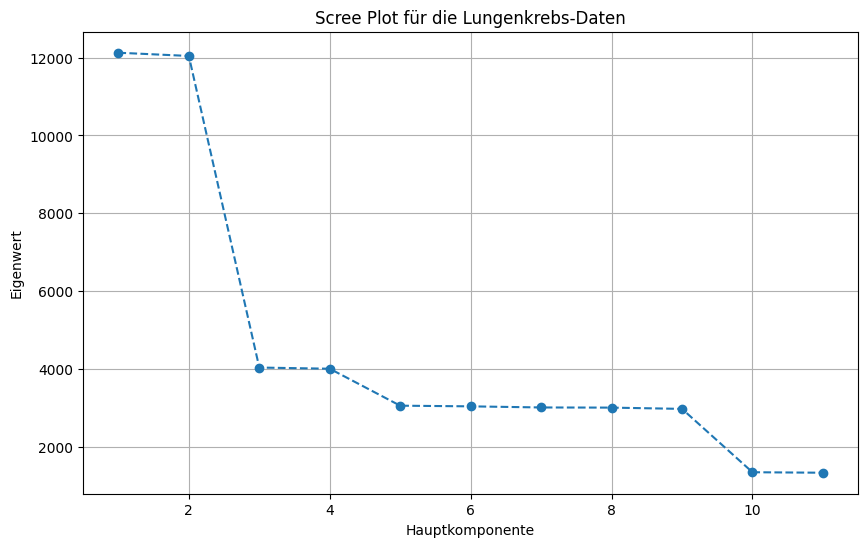

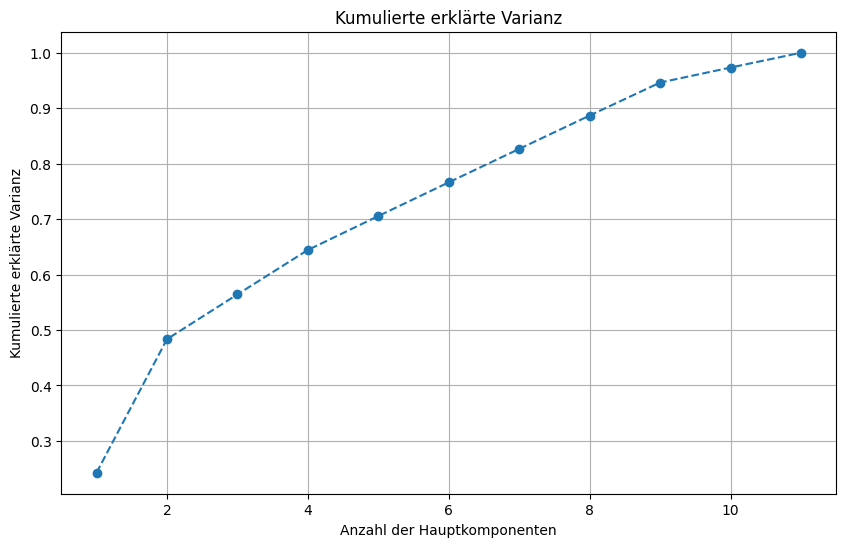

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np

# Numerische und kategoriale Spalten trennen
numeric_features = ['age', 'pack_years']
categorical_features = ['gender', 'radon_exposure', 'alcohol_consumption']
boolean_features = ['asbestos_exposure', 'secondhand_smoke_exposure',
                    'copd_diagnosis', 'family_history']

# Preprocessing definieren
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features),
        ('bool', 'passthrough', boolean_features)
    ])

# PCA-Pipeline ohne Komponentenbeschränkung
pca_full = PCA(n_components=None)  # Keine Beschränkung der Komponenten
pipeline_full = Pipeline(steps=[('preprocessor', preprocessor),
                                ('pca', pca_full)])

# Daten vorbereiten (Zielvariable 'lung_cancer' nicht nutzen!)
X = dataset.drop('lung_cancer', axis=1)

# PCA ausführen
pipeline_full.fit(X)

# Erklärte Varianzanteile erhalten
explained_variance_ratio = pca_full.explained_variance_ratio_

# Eigenwerte berechnen
eigenvalues = explained_variance_ratio * len(X)

# Scree Plot erstellen
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--')
plt.xlabel('Hauptkomponente')
plt.ylabel('Eigenwert')
plt.title('Scree Plot für die Lungenkrebs-Daten')
plt.grid(True)
plt.show()

# Kumulierte erklärte Varianz
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Anzahl der Hauptkomponenten')
plt.ylabel('Kumulierte erklärte Varianz')
plt.title('Kumulierte erklärte Varianz')
plt.grid(True)
plt.show()

Visualisierung der PCA mit zwei Hauptkompoenten

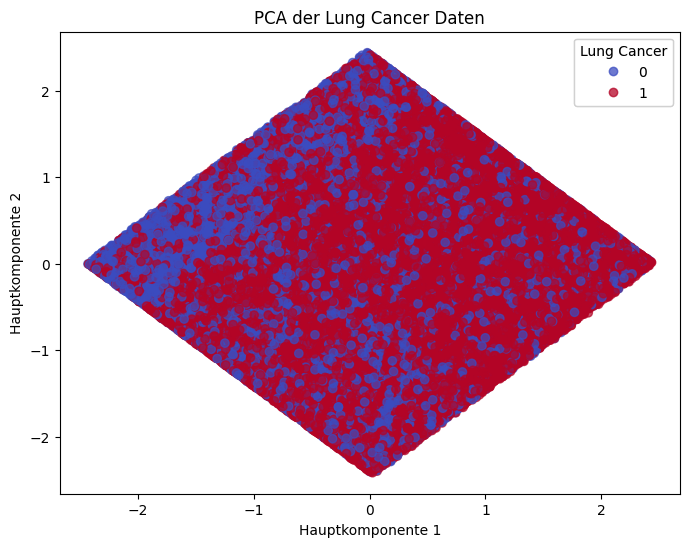

In [9]:
import matplotlib.pyplot as plt

# PCA-Pipeline
pca = PCA(n_components=2)  # z.B. 2 Hauptkomponenten
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('pca', pca)])

# Daten vorbereiten (Zielvariable 'lung_cancer' nicht nutzen!)
X = dataset.drop('lung_cancer', axis=1)

# PCA ausführen
X_pca = pipeline.fit_transform(X)

# Ergebnisse in DataFrame packen
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# PCA mit Zielvariable zusammenführen
pca_df['lung_cancer'] = dataset['lung_cancer'].values

plt.figure(figsize=(8,6))
scatter = plt.scatter(
    pca_df['PC1'], pca_df['PC2'],
    c=pca_df['lung_cancer'],  # Farbe nach Zielvariable
    cmap='coolwarm', alpha=0.7
)

plt.xlabel("Hauptkomponente 1")
plt.ylabel("Hauptkomponente 2")
plt.title("PCA der Lung Cancer Daten")

# Legende
legend1 = plt.legend(*scatter.legend_elements(),
                     title="Lung Cancer")
plt.gca().add_artist(legend1)

plt.show()


PCA mit vier Hauptkomponenten und Analyse der Varianzteile

In [10]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# **PCA-Pipeline mit 4 Komponenten**
pca = PCA(n_components=4) 
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('pca', pca)])

# Daten vorbereiten (Zielvariable 'lung_cancer' nicht nutzen!)
X = dataset.drop('lung_cancer', axis=1)

# PCA ausführen
X_pca = pipeline.fit_transform(X)

# Ergebnisse in einen DataFrame packen
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4'])
print(pca_df.head())

# Erklärte Varianzanteile für die 4 Komponenten
print("\nVarianzanteile der 4 Komponenten:", pca.explained_variance_ratio_)

        PC1       PC2       PC3       PC4
0  0.705337 -0.091829 -0.345425  0.611185
1 -1.696736  0.103087 -0.331265  0.625568
2 -0.347792  2.108764 -0.282908 -0.948608
3  0.423018  0.709496  0.277061  0.958140
4 -0.758917 -0.478093 -0.272156 -0.972455

Varianzanteile der 4 Komponenten: [0.24248565 0.24082652 0.08076921 0.08016464]


Visualisierung der vier Hauptkomponenten (Pairplot)

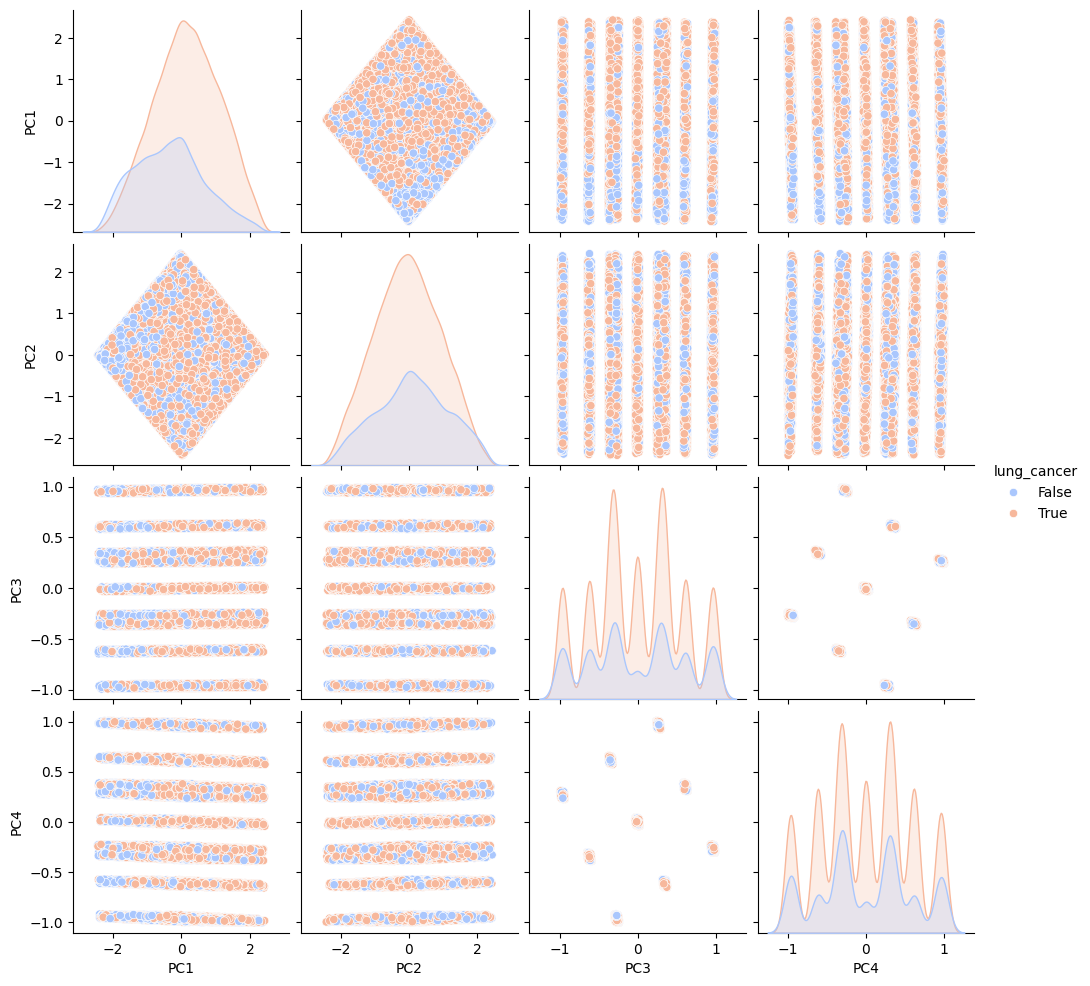

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Wir verwenden den zuvor erstellten pca_df DataFrame
# und fügen die Zielvariable wieder hinzu.
pca_df['lung_cancer'] = dataset['lung_cancer'].values

# Erstelle ein Pairplot
sns.pairplot(
    pca_df, 
    hue='lung_cancer', 
    vars=['PC1', 'PC2', 'PC3', 'PC4'], 
    palette='coolwarm',
    markers='o'
)
plt.show()

Berechnung und Analyse der Ladevektoren (Loadings)

In [12]:
# Erhalte die Spaltennamen nach dem Preprocessing
feature_names_list = []
# Numerische Features
feature_names_list.extend(numeric_features)
# Kategoriale Features nach One-Hot-Encoding
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names_list.extend(ohe_feature_names)
# Boolesche Features
feature_names_list.extend(boolean_features)

# Extrahiere die Ladevektoren (Loadings)
loadings = pipeline.named_steps['pca'].components_

# Erstelle einen DataFrame für die übersichtliche Darstellung
loading_df = pd.DataFrame(
    loadings.T, 
    columns=['PC1', 'PC2', 'PC3', 'PC4'], 
    index=feature_names_list
)

# Zeige die Loadings an
print("Loadings (Beiträge der Variablen zu den Hauptkomponenten):")
print(loading_df)

# Um die wichtigsten Variablen pro Komponente zu sehen, kannst du die Werte sortieren
for pc_num in range(4):
    pc_name = f'PC{pc_num+1}'
    print(f"\nTop 5 Beiträge für {pc_name}:")
    print(loading_df[pc_name].abs().sort_values(ascending=False).head(5))

Loadings (Beiträge der Variablen zu den Hauptkomponenten):
                                   PC1       PC2       PC3       PC4
age                           0.702913  0.711244  0.002701 -0.002507
pack_years                    0.711184 -0.702888  0.002165 -0.011466
gender_Male                   0.001913 -0.003382 -0.005116  0.021438
radon_exposure_Low           -0.001147 -0.002037  0.615644  0.347609
radon_exposure_Medium        -0.003811  0.002737 -0.615027 -0.348294
alcohol_consumption_Moderate  0.006771 -0.003268 -0.344736  0.615976
alcohol_consumption_None     -0.007803  0.004045  0.350858 -0.614555
asbestos_exposure            -0.001110 -0.001699 -0.022504  0.005247
secondhand_smoke_exposure    -0.001079 -0.003444  0.002005  0.011239
copd_diagnosis                0.000929 -0.001250 -0.000353 -0.001760
family_history               -0.001074 -0.003742  0.015205 -0.000448

Top 5 Beiträge für PC1:
pack_years                      0.711184
age                             0.702913
alcoho